In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../processed_data/merged_data_2013-2022.csv')
df = df.drop(columns=["Unnamed: 0"])

using models to explore further on the complex relationship:

In [ ]:
# simple OLS regression model
# note: this fit does not account for the whole strength of the relationship
model = smf.ols("asthma_rate ~ median_aqi", data=df).fit()
print(model.summary())

In [3]:
# multiple OLS regression model
# note: more complex model but gave much more stronger relationship between aqi and asthma rate

# "aqi vs asthma rate by county and year"
mod = smf.ols('asthma_rate ~ median_aqi + C(county) + C(year)', data=df).fit()
print(mod.summary())

# extracting the observed, predicted, and residuals
y = df['asthma_rate']
y_pred  = mod.fittedvalues
residuals = mod.resid

                            OLS Regression Results                            
Dep. Variable:            asthma_rate   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     52.90
Date:                Tue, 24 Jun 2025   Prob (F-statistic):          6.40e-174
Time:                        14:51:18   Log-Likelihood:                -1677.4
No. Observations:                 529   AIC:                             3481.
Df Residuals:                     466   BIC:                             3750.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

visualizations of the regression results:

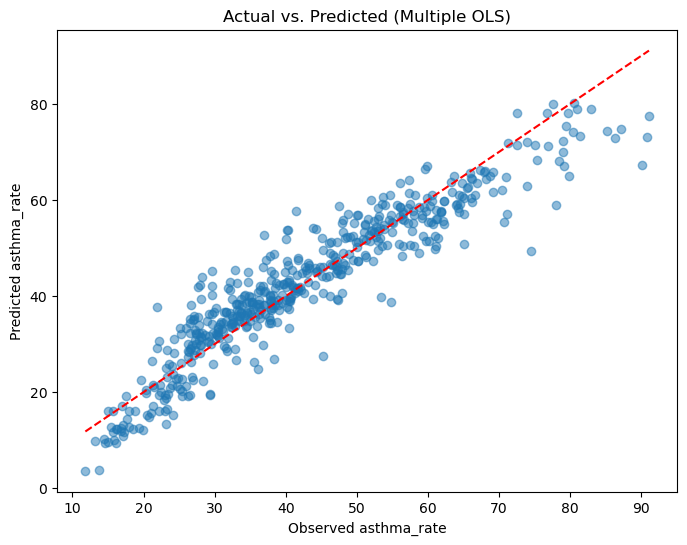

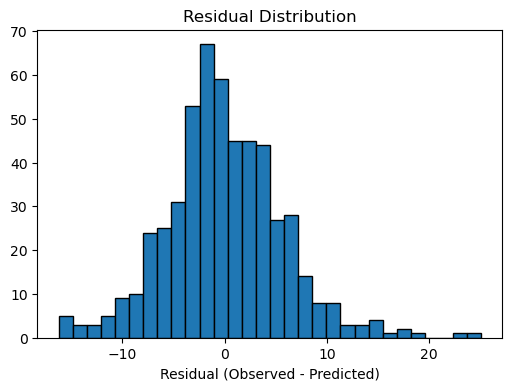

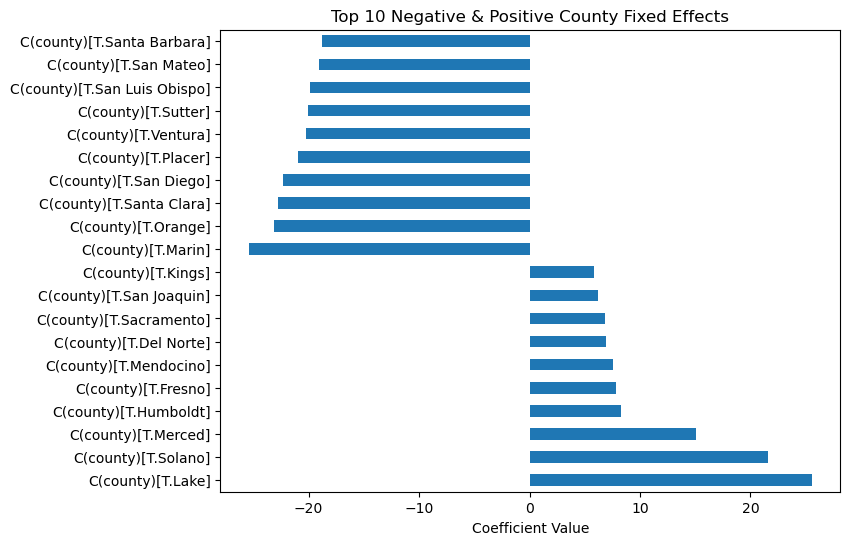

In [4]:
# actual vs. predicted scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Observed asthma_rate')
plt.ylabel('Predicted asthma_rate')
plt.title('Actual vs. Predicted (Multiple OLS)')
plt.show()

# residuals distribution histogram
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residual (Observed - Predicted)')
plt.title('Residual Distribution')
plt.show()

# top county fixed effects
coefs = mod.params.filter(like='C(county)')
top_pos = coefs.sort_values(ascending=False).head(10) # plot top 10 positive
top_neg = coefs.sort_values().head(10) # plot top 10 negative
plot_coefs = pd.concat([top_pos, top_neg])

plt.figure(figsize=(8,6))
plot_coefs.plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Negative & Positive County Fixed Effects')
plt.show()

In [8]:
# 1. Attach predictions & residuals to your DataFrame
df['y_pred']   = mod.fittedvalues
df['residual'] = mod.resid

# 2. Save that enriched table
df.to_csv('../processed_data/ols_results.csv', index=False)

# 3. Save model summary & coefficients for reference
with open('../processed_data/ols_summary.txt','w') as f:
    f.write(mod.summary().as_text())

coef_df = mod.params.reset_index()
coef_df.columns = ['term','estimate']
coef_df.to_csv('../processed_data/ols_coefficients.csv', index=False)
